In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
digits = datasets.load_digits()
print(type(digits))
print(digits.data.shape)

<class 'sklearn.utils.Bunch'>
(1797, 64)


<Figure size 432x288 with 0 Axes>

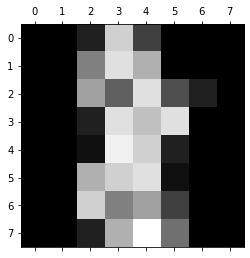

In [8]:
plt.gray() 
plt.matshow(digits.images[170]) 
plt.show()

In [9]:
def initialize(m,features) :
    weights = np.random.randint(100,size=(features+1,1))*0.01
    X = digits.data
    y = digits.target.reshape(m,1)
    X = np.c_[np.ones((m,1)),X]
    
    return X,y,weights


In [10]:
def sigmoid(z) :
    sig = 1/(1+np.exp(-z)) 
    return sig

In [11]:
def gradient_descent(X,y,weights,learning_rate,iterations) :
    for i in range(iterations) :
        # X -> m,65   weights -> 65,1
        hypothesis = sigmoid(np.dot(X,weights))
        with np.errstate(all='ignore'):
            cost = -np.mean(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))
        cost_diff = -np.mean(X*(y-hypothesis),axis = 0).reshape(features+1,1)
        weights = weights -  learning_rate*(cost_diff)   
    print("Cost", cost)
    return weights

In [24]:
def train(m,features,k):
    final_weights = np.zeros((features+1,1))
    for i in range(k) :
        print("For digit",i)
        
        X_mod,y,weights = initialize(m,features)

        rows = (y == i)
        output = rows.astype(int).reshape((X_mod.shape[0],1))

        weights = gradient_descent(X_mod,output,weights,learning_rate=0.05,iterations=500)
        final_weights = np.concatenate((final_weights,weights),axis=1)
    final_weights = final_weights[:,1:]
    return final_weights,X_mod,y

In [25]:
def predict(X,y,final_weights):
    predictions = sigmoid(np.dot(X,final_weights))
    predictions = np.argmax(predictions,axis = 1).reshape(m,1)
    accuracy = predictions == y
    print("Accuracy of model",np.mean(accuracy)*100)
    return predictions

In [26]:
m = digits.data.shape[0]
features = digits.data.shape[1]
k = 10

final_weights,X,y = train(m,features,k)
prediction = predict(X,y,final_weights) 

For digit 0
Cost 0.004868778879300511
For digit 1
Cost 0.06627115925454054
For digit 2
Cost 0.004421967996932229
For digit 3
Cost 0.03801941066970731
For digit 4
Cost 0.006820939679985788
For digit 5
Cost 0.019275137836012608
For digit 6
Cost 0.018947772837467562
For digit 7
Cost 0.01921267585410332
For digit 8
Cost 0.16162389458950527
For digit 9
Cost 0.05193638740120931
Accuracy of model 97.16193656093489
